In [1]:
from oyv.imports import *

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


In [48]:
%matplotlib inline

In [62]:
import sklearn
from sklearn.cluster import k_means
from sklearn import datasets, model_selection# import digits = datasets.load_digits()
from numpy.random import rand

### Load the digits dataset

In [6]:
digits = datasets.load_digits()

In [10]:
digits.images.shape # The data (8x8 images)

(1797, 8, 8)

In [8]:
digits.data.shape # The same, flattened 8x8 -> 64 

(1797, 64)

In [17]:
# Check that they are actually the same
(digits.images.reshape(1797, 64) == digits.data).all()

True

In [37]:
digits.target.shape # The classification

(1797,)

In [56]:
#print(digits.DESCR) # Dataset description

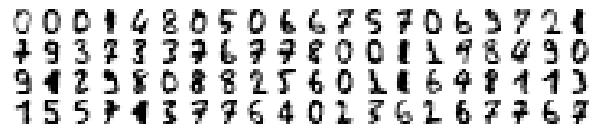

In [58]:
# Plot some (random) examples
Nx, Ny = 20, 4
fig, ax =plt.subplots(Ny, Nx, figsize = (7.5, 1.5))
for nn in np.arange(Ny):
    for mm in np.arange(Nx):
        ind = int(rand()*1797)
        ax[nn, mm].imshow(digits.images[ind], cmap = 'Greys')
        pretty.nobars(ax[nn, mm])
        ax[nn, mm].tick_params(top=False, left = False, right = False, bottom = False, 
                               labelbottom = False, labelleft = False)

### Create training dataset

In [74]:
# Neat sklearn function to split (default train/test ratio is 0.75/0.25)
data_train, data_test, lab_train, lab_test = model_selection.train_test_split(
    digits.data, digits.target)

In [73]:
print(np.shape(data_train))
print(np.shape(data_test))
print(np.shape(lab_train))
print(np.shape(lab_test))

(1347, 64)
(450, 64)
(1347,)
(450,)


### Try binary classifier

In [75]:
from sklearn.linear_model import SGDClassifier

In [76]:
sdg_clf = SGDClassifier(random_state = 42)

In [78]:
sdg_clf.fit(data_train, lab_train)

SGDClassifier(random_state=42)

##### Quick test 

In [106]:
img_nn = int(np.random.rand()*450)
print('Quick test (random sample from the test dataset):')
img_digit = data_test[img_nn]
true_digit = lab_test[img_nn]
print('True digit is: %.i'%true_digit)
pred_digit = sdg_clf.predict([img_digit])[0]
print('Predicted digit is: %.i'%pred_digit)

Quick test (random sample from the test dataset):
True digit is: 5
Predicted digit is: 5


## More rigourous validation using sklearn functions

### Cross-validation (*not* very useful for classifier..)

In [125]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [127]:
cv_scores = cross_val_score(sdg_clf, data_train, lab_train, cv = 10)
rmse_cv_scores = np.sqrt(cv_scores)
print('Cross validation RMSE scores: %s'%rmse_cv_scores)

Cross validation RMSE scores: [0.97372899 0.97372899 0.97372899 0.9699179  0.97372899 0.96225045
 0.97752522 0.98116592 0.97353027 0.97735555]


### Confusion matrix etc

Note: We are doing *multiclass* classification (rather than binary). In Geron book we therefore need to look at page >95..

In [150]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve

In [149]:
lab_train_pred = cross_val_predict(sdg_clf, data_train, lab_train, cv = 10, method =  'decision_function')

In [152]:
precs, recs, thrs = precision_recall_curve(lab_train, lab_train_pred)

ValueError: multiclass format is not supported

##### Print the confusion matrix

In [131]:
print(confusion_matrix(lab_train, lab_train_pred))

[[138   0   1   0   0   0   0   0   0   0]
 [  0 121   0   2   0   0   2   0   6   2]
 [  0   1 140   0   0   0   0   0   0   0]
 [  0   1   0 125   0   2   0   0   5   3]
 [  0   1   0   0 130   0   1   0   2   0]
 [  0   1   0   0   0 130   1   0   0   3]
 [  0   2   0   0   1   0 132   0   1   0]
 [  0   1   0   1   0   0   0 121   0   3]
 [  1  11   0   2   0   0   0   0 110   2]
 [  0   2   0   2   0   1   0   1   5 130]]


##### Print precision and recall
*Precision*: How often the prediction is correct
*Recall*: How many of the instances it correctly detects

In [144]:
print(recall_score(lab_train, lab_train_pred))

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [140]:
print(recall)

NameError: name 'recall' is not defined

In [ ]:
(array([5, 7, 4, ..., 5, 6, 5]), array([5, 7, 4, ..., 5, 4, 5]))

In [137]:
print('Precision: %s:'%(precision_score(lab_train, lab_train_pred )))

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

### Test dataset

In [119]:
from sklearn.metrics import mean_squared_error

In [118]:
final_predict = sdg_clf.predict(data_test)

In [120]:
final_mse = mean_squared_error(lab_test, final_predict)

In [121]:
final_mse

1.0